## Projekt 2 - Klasteryzacja
### Human Activity Recognition Using Smartphones Data Set
#### Milestone 1 - EDA

In [1]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

merged = pd.concat([test, train])

In [3]:
merged.shape

(10299, 563)

In [4]:
merged.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


Zbiór zawiera dane zebrane od 30 osób (kolumna `subject`), które wykonywały 6 różnych czynności (`Activity`) ze smartfonem przypiętym do talii który to za pomocą czujników (akcelerometru i żyroskopu) zbierał dane. Czynności, które osoby te wykonywały to:

- Chodzenie (WALKING)
- Wchodzenie (WALKING_UPSTAIRS)
- Schodzenie (WALKING_DOWNSTAIRS)
- Siedzenie (SITTING)
- Stanie (STANDING)
- Leżenie (LAYING)

In [5]:
merged.isnull().values.sum()

0

Nie ma brakujących wartości.


Zbiór posiada **10299** rekordów oraz **563** kolumny (561, które nam się przydadzą). <br /> Nie mamy żadnych zduplikowanych rekordów ani braków w danych. <br /> Istotne cechy są również znormalizowane (należą do przedziału $[-1,\, 1]$).

In [6]:
main_features = merged.groupby(lambda x: x.split('-')[0].split('(')[0], axis=1).sum().columns
print("\n".join(main_features))

Activity
angle
fBodyAcc
fBodyAccJerk
fBodyAccMag
fBodyBodyAccJerkMag
fBodyBodyGyroJerkMag
fBodyBodyGyroMag
fBodyGyro
subject
tBodyAcc
tBodyAccJerk
tBodyAccJerkMag
tBodyAccMag
tBodyGyro
tBodyGyroJerk
tBodyGyroJerkMag
tBodyGyroMag
tGravityAcc
tGravityAccMag


Dodatkowo, niektóre kolumny zawierą też zapisy w każdym z trzech wymiarów oznacze jako X, Y oraz Z. <br />
Wiele kolumn jest posiada też wiele metryk statystycznych takich jak średnia, odychelenie standardowe, MAD itp.


Cel: klasteryzacja danych

Początkowe obserwacje:

- możliwy podział na 6 klastrów (6 różnych aktywności).
- niektóre mogą być ciężko rozróżnialne, więc być może podział na 2 klastry może okazać się lepszy:
    - 1 - aktywności wymagające ruch
    - 2 - aktywności nie wymagające ruchu
- połączenie kilku aktywności w jedną i podział na 3-5 klastrów

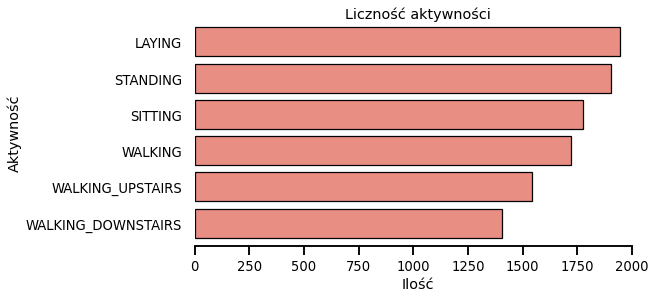

In [7]:
activity_counts = merged['Activity'].value_counts()

sns.set_context("talk", font_scale=0.8)
fig, ax = plt.subplots(figsize=(8, 4))

g = sns.barplot(y=activity_counts.index, x=activity_counts, color="salmon", edgecolor=".01", linewidth=1.25)

plt.title("Liczność aktywności")
plt.ylabel("Aktywność")
plt.xlabel("Ilość")

plt.tick_params(left=False)
sns.despine(trim=True, left=True, offset={'bottom': 5})

Rozkład aktywności jest w miarę zbalansowany.

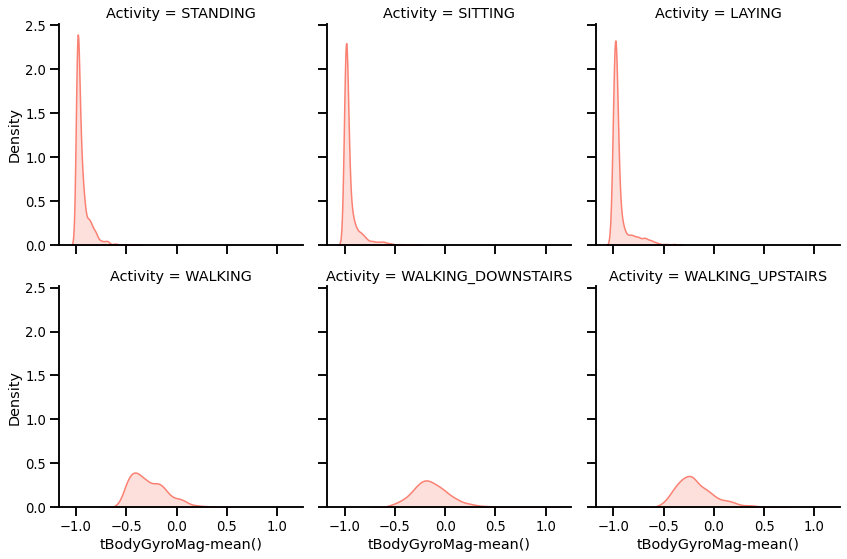

In [8]:
sns.displot(merged, x="tBodyGyroMag-mean()", kind="kde", col="Activity", fill=True, col_wrap=3, color="salmon", height=4)

plt.show()

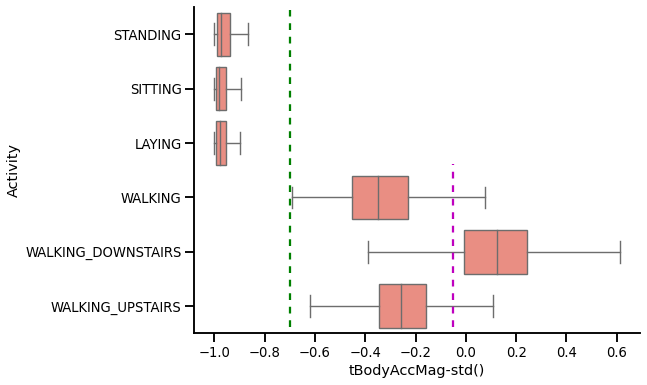

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(y='Activity', x='tBodyAccMag-std()', data=merged, showfliers=False,  linewidth=1.4, color='salmon') # tBodyGyro-std()-X # tGravityAccMag-std()
plt.axvline(x=-0.7, ymin=0.02, ymax=0.99, dashes=(3, 3), c='g')
plt.axvline(x=-0.05, ymin=0.02, ymax=0.52, dashes=(3, 3), c='m')

sns.despine()
plt.show()


Widzimy, że na podstawie zmiennej `tBodyAccMag-mean()` (Wzmocnienie przyspieszenia) możemy jednoznacznie (z dokładnością do outlierów) rozróżnić czynności statyczne od dynamicznych.

Możemy też zauważyć że Schodzenie przeważnie przyjmuje najwyższe wartości w tej zmiennej.

Zastanawiąc się czym może różnić się leżenie od innych czynności statycznych możemy wpaść na pomysł aby sprawdzić kąt - `angle()`

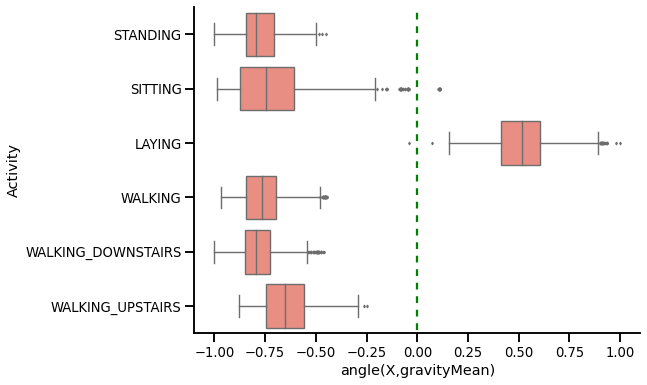

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(y='Activity', x='angle(X,gravityMean)', data=merged, color='salmon', linewidth=1.4, fliersize=2)
plt.axvline(x=0, ymin=0.01, ymax=0.99, dashes=(3, 3), c='g')

sns.despine()
plt.show()

Widzimy że istnieje zmienna pozwalająca rozróżnić Leżenie od pozostałych aktywności

Z aktywności statycznych pozostało nam znaleźć zmienną która pozwoli nam rozróżnić siedzenie od stania. // ciężko znaleźć

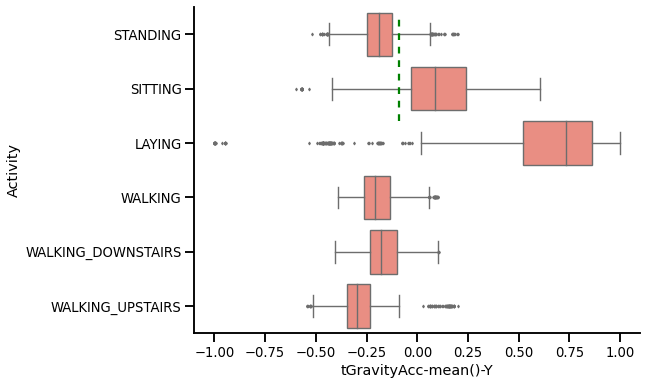

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(y='Activity', x='tGravityAcc-mean()-Y', data=merged, color='salmon', linewidth=1.4, fliersize=2)
plt.axvline(x=-0.09, ymin=0.65, ymax=0.98, dashes=(3, 3), c='g')

sns.despine()
plt.show()
 

Następne kroki:
- Redukcja wymiarów
- Wartości odstające